In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [4]:
df = pd.read_csv("AGDA.csv")
df.head()

,LOCUS,BerlethS1_tair,BerlethS2_tair,BerlethS3_tair,BerlethS4_tair,BerlethS5_tair,BerlethS6_tair,CitovskyJ25_tair,CitovskyJ26_tair,ConstantinoV11_tair,...,FatlandSlide1121800_tair,FatlandSlide2121800_tair,Krizekslide2112000_tair,Moehsslide1101800_tair,Moehsslide2101800_tair,NikolauSlide1121800_tair,NikolauSlide2121800_tair,V62V11_tair,V64_tair,V66_tair
0,AT4G38800,1.103,1.017,1.102,-1.173,1.038,1.097,1.762,-1.064,-1.067,...,1.048,1.118,-1.078,1.317,-1.440,1.093,1.241,1.121,1.168,1.049
1,AT5G22050,-1.421,-2.014,1.794,1.895,-1.006,-1.037,-1.893,-1.040,1.066,...,-1.267,1.268,1.078,-1.552,1.062,1.113,-1.184,-1.577,-1.149,-1.048
2,AT1G10460,1.068,-2.083,-1.087,-1.789,-1.149,1.002,1.518,-1.116,-1.172,...,-1.061,-1.178,1.020,1.465,-1.239,-1.037,-1.199,1.207,1.300,1.027
3,AT3G16950,-1.562,-1.311,-1.264,-1.148,-1.040,-1.118,-1.204,1.023,1.064,...,1.117,1.079,1.034,-1.002,1.628,-1.166,-1.237,-1.458,1.156,1.035
4,AT3G58750,-1.083,-1.412,1.237,-1.238,1.292,1.735,1.541,-1.058,1.085,...,1.081,1.013,1.140,1.896,-1.286,-1.306,-1.189,1.137,1.225,1.168


## FILTER METHOD: Pearson correlation

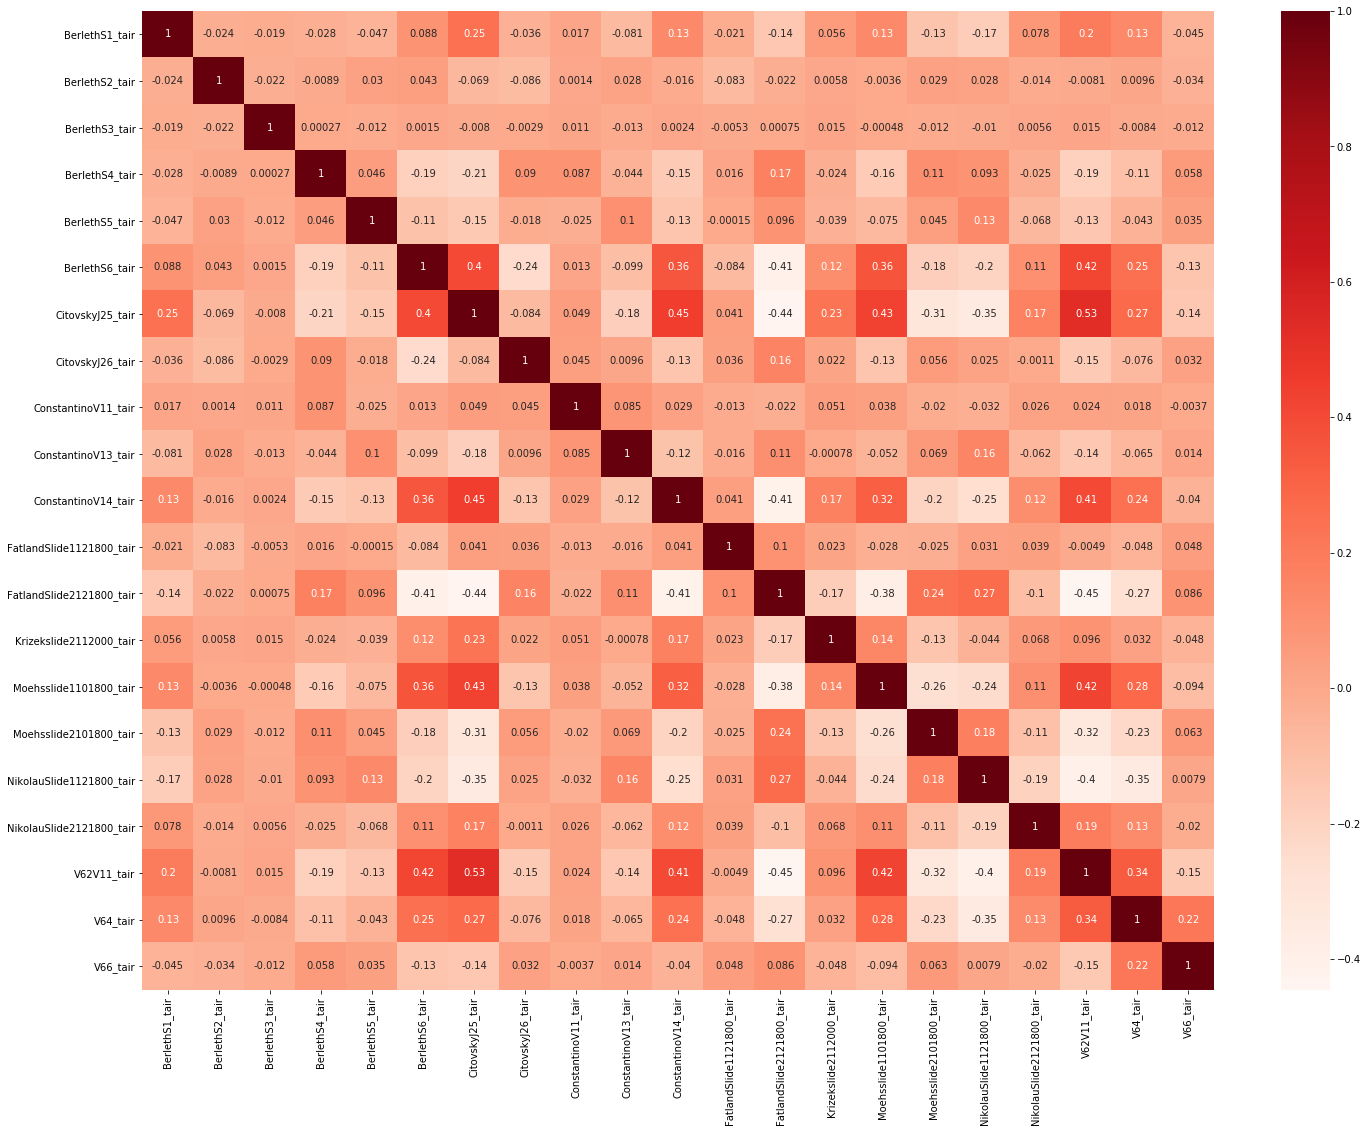

In [35]:
plt.figure(figsize=(24,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("CorrPearson.jpg")
plt.show()


In [4]:
# # Función de iteración para conocer que correlaciones son mayores
# #Correlation with output variable
# cor_target = abs(cor["MEDV"])
# Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
# relevant_features

In [36]:
# Correlation > 0,4
name_assay = df.columns[1:]
for i in name_assay:
    cor_target = (cor[i])
    cor_target =(cor_target[cor_target>0.4])
    print(cor_target)
"""BerlethS5_tair, BerlethS6_tair,ConstantinoV13_tair, Moehsslide1101800_tair, V62V11_tair  """

BerlethS1_tair    1.0
Name: BerlethS1_tair, dtype: float64
BerlethS2_tair    1.0
Name: BerlethS2_tair, dtype: float64
BerlethS3_tair    1.0
Name: BerlethS3_tair, dtype: float64
BerlethS4_tair    1.0
Name: BerlethS4_tair, dtype: float64
BerlethS5_tair    1.0
Name: BerlethS5_tair, dtype: float64
BerlethS6_tair      1.000000
CitovskyJ25_tair    0.404618
V62V11_tair         0.415634
Name: BerlethS6_tair, dtype: float64
BerlethS6_tair            0.404618
CitovskyJ25_tair          1.000000
ConstantinoV14_tair       0.450922
Moehsslide1101800_tair    0.430111
V62V11_tair               0.525892
Name: CitovskyJ25_tair, dtype: float64
CitovskyJ26_tair    1.0
Name: CitovskyJ26_tair, dtype: float64
ConstantinoV11_tair    1.0
Name: ConstantinoV11_tair, dtype: float64
ConstantinoV13_tair    1.0
Name: ConstantinoV13_tair, dtype: float64
CitovskyJ25_tair       0.450922
ConstantinoV14_tair    1.000000
V62V11_tair            0.405755
Name: ConstantinoV14_tair, dtype: float64
FatlandSlide1121800_tair    

'BerlethS5_tair, BerlethS6_tair,ConstantinoV13_tair, Moehsslide1101800_tair, V62V11_tair  '

In [37]:
# Correlation <-0,4
for i in name_assay:
    cor_target = (cor[i])
    cor_target =(cor_target[cor_target<-0.4])
    print(cor_target)

Series([], Name: BerlethS1_tair, dtype: float64)
Series([], Name: BerlethS2_tair, dtype: float64)
Series([], Name: BerlethS3_tair, dtype: float64)
Series([], Name: BerlethS4_tair, dtype: float64)
Series([], Name: BerlethS5_tair, dtype: float64)
FatlandSlide2121800_tair   -0.406343
Name: BerlethS6_tair, dtype: float64
FatlandSlide2121800_tair   -0.435509
Name: CitovskyJ25_tair, dtype: float64
Series([], Name: CitovskyJ26_tair, dtype: float64)
Series([], Name: ConstantinoV11_tair, dtype: float64)
Series([], Name: ConstantinoV13_tair, dtype: float64)
FatlandSlide2121800_tair   -0.412606
Name: ConstantinoV14_tair, dtype: float64
Series([], Name: FatlandSlide1121800_tair, dtype: float64)
BerlethS6_tair        -0.406343
CitovskyJ25_tair      -0.435509
ConstantinoV14_tair   -0.412606
V62V11_tair           -0.445044
Name: FatlandSlide2121800_tair, dtype: float64
Series([], Name: Krizekslide2112000_tair, dtype: float64)
Series([], Name: Moehsslide1101800_tair, dtype: float64)
Series([], Name: M

In [74]:
col = df.drop('LOCUS',1)
df = df.drop('LOCUS',1)

## Wrapped Method: RFE (Recursive Feature Elimination)

In [77]:
for a in col:
    X = df.drop(a,1)   # Feature Matrix
    y = df[a]          # Target Variable
    nof_list=np.arange(1,len(df.columns))   # no of features
    high_score=0
    nof=0           
    score_list =[]  # Variable to store the optimum features
    """
        Method works by recursively removing 
        attributes and building a model on those 
        attributes that remain. It uses accuracy 
        metric to rank the feature according to their importance. 
        The RFE method takes the model to be used and the number 
        of required features as input.
    """
    for n in range(len(nof_list)):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
        model = LinearRegression()
        rfe = RFE(model,nof_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        score = model.score(X_test_rfe,y_test)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            nof = nof_list[n]
    print("Output Variable: %s" %a)
    print("Optimum number of features: %d" %nof)
    print("Score with %d features: %f" % (nof, high_score))


Output Variable: BerlethS1_tair
Optimum number of features: 18
Score with 18 features: 0.101553
Output Variable: BerlethS2_tair
Optimum number of features: 14
Score with 14 features: 0.036297
Output Variable: BerlethS3_tair
Optimum number of features: 0
Score with 0 features: 0.000000
Output Variable: BerlethS4_tair
Optimum number of features: 2
Score with 2 features: 0.044195
Output Variable: BerlethS5_tair
Optimum number of features: 11
Score with 11 features: 0.109310
Output Variable: BerlethS6_tair
Optimum number of features: 17
Score with 17 features: 0.318907
Output Variable: CitovskyJ25_tair
Optimum number of features: 20
Score with 20 features: 0.476728
Output Variable: CitovskyJ26_tair
Optimum number of features: 19
Score with 19 features: 0.101135
Output Variable: ConstantinoV11_tair
Optimum number of features: 13
Score with 13 features: 0.045385
Output Variable: ConstantinoV13_tair
Optimum number of features: 2
Score with 2 features: 0.076402
Output Variable: ConstantinoV14_

In [78]:
colsX = list(X.columns)
model = LinearRegression()
"""
    We now feed 10 as number of features 
    to RFE and get the final set of features 
    given by RFE method
"""
rfe = RFE(model, 18)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = colsX)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['BerlethS1_tair', 'BerlethS2_tair', 'BerlethS3_tair', 'BerlethS4_tair',
       'BerlethS6_tair', 'CitovskyJ25_tair', 'CitovskyJ26_tair',
       'ConstantinoV13_tair', 'ConstantinoV14_tair',
       'FatlandSlide1121800_tair', 'FatlandSlide2121800_tair',
       'Krizekslide2112000_tair', 'Moehsslide1101800_tair',
       'Moehsslide2101800_tair', 'NikolauSlide1121800_tair',
       'NikolauSlide2121800_tair', 'V62V11_tair', 'V64_tair'],
      dtype='object')


## Embedded Method: Lasso

In [79]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.038991
Best score using built-in LassoCV: 0.129534


In [80]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 10 variables


Text(0.5, 1, 'Feature importance using Lasso Model')

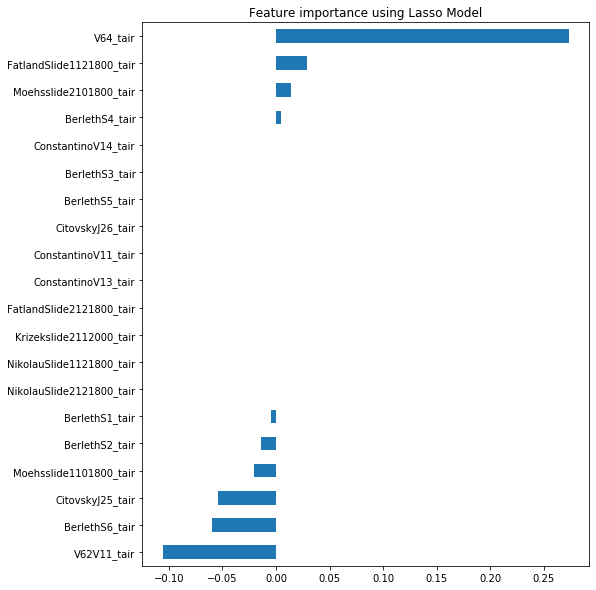

In [81]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.savefig("lasso.jpg")
plt.title("Feature importance using Lasso Model")